In [1]:
from scipy.integrate import *
from pandas import *
from numpy import *
from pylab import *
from scipy import *
import math
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
# time change (discrete time)
T = 24.0 
delt = 1.0/240.0
t = np.linspace(0, T, int(T/delt)) #time array
#t = np.linspace(0,T,int(T/dt))
#print(t)

# array  to store  the  solution
N = np.zeros(len(t))
P = np.zeros(len(t))
N[0] = 10 #starting value
P[0] = 5 #starting value
H = np.zeros(len(t))
H[0] = 0 #starting value
CDOM = np.zeros(len(t))
CDOM[0] = 1 #starting value
y0 = np.array([N[0], P[0], CDOM[0], H[0]]) #create an array with your starting values for odeint
print(y0)

[10.  5.  1.  0.]


In [3]:
zetas = np.linspace(0,80,50) #depth array
alpha = 1 #efficiency to use light 
k = 0.03 #attenuation constant 
print(len(zetas))

50


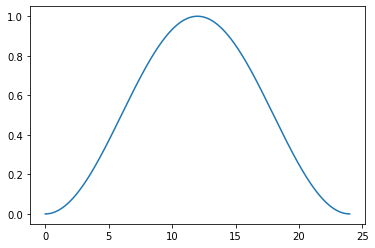

In [4]:
I_naughts = (np.sin((t/T)*2*math.pi-math.pi/2)+1)/2 #light equation for 1 year
#alpha_knots = ones(int(T/delt))
plt.plot(t,I_naughts)

In [5]:
#light reshape and changing into an array
Is = []
for I_naught in I_naughts:
    I = I_naught * np.exp(-k*zetas)
    Is.append(I)
light_att = np.array(Is)
lights = light_att.T

print(light_att.shape)
print(zetas.shape)
print(I_naughts.shape)
print(lights.shape)

(5760, 50)
(50,)
(5760,)
(50, 5760)


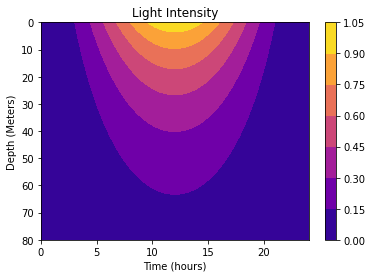

In [6]:
#contour plot of light intensity
plt.contourf(t,zetas,lights,cmap = 'plasma')
plt.gca().invert_yaxis()
plt.xlabel('Time (hours)', color = 'k')
plt.ylabel('Depth (Meters)', color = 'k')
plt.title('Light Intensity')
plt.colorbar()
plt.savefig("light_cycle_variable", bbox_inches='tight', dpi=300)

In [7]:
#making sure light equation matches (had issues with time array until put them together in spline)
I_naughts_interp = InterpolatedUnivariateSpline(t, I_naughts)

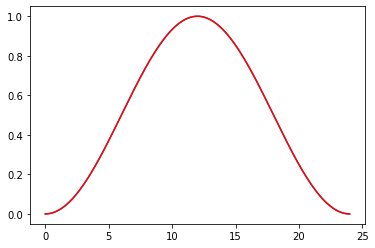

In [8]:
plt.plot(t, I_naughts)
plt.plot(t, I_naughts_interp(t), 'r')

In [9]:
#my function with light intensity and N and P models
def nbl_model(y, t, delta_p, delta_h, delta_cdom, Q_f, alpha, S_R, k):
    N, P, CDOM, H = y[0], y[1], y[2], y[3]
    I_naught = I_naughts_interp(t)
    if I_naught < 0:
        I_naught = 0.
    I = I_naught * np.exp(-k*zeta)
    dNdt = S_R - ((alpha*N)/(N+k))*P
    dPdt = ((alpha*N)/(N+k))*P - delta_p*P
    dCDOMdt = delta_p*P - delta_cdom*CDOM
    dHdt = CDOM*I*Q_f - delta_h*H 
    return np.array([dNdt, dPdt, dCDOMdt, dHdt])

#- delta_b*C*H
#, delta_b, C

In [10]:
delta_h = 0.02 #death rate
delta_p = 0.05
delta_cdom = 0.1
#delta_b = 0.001
k = 0.03

#C = 10
Q_f = 7 #hydrogen peroxide per mol CDOM per quanta
alpha = 0.35
S_R = 10

#using odeint for functions
tim = []
for zeta in zetas:
    integ_sivz = odeint(nbl_model, y0, t, args=(delta_p, delta_h, delta_cdom, Q_f, alpha, S_R, k))
    tim.append(integ_sivz)
sols = np.array(tim)
print(sols)

#, delta_b, C

[[[1.00000000e+01 5.00000000e+00 1.00000000e+00 0.00000000e+00]
  [1.00343982e+01 5.00623319e+00 1.00062563e+00 5.30172816e-09]
  [1.00687873e+01 5.01247423e+00 1.00125229e+00 2.76577281e-08]
  ...
  [7.06522521e-03 1.49892162e+02 5.32271240e+01 1.42261577e+03]
  [7.06461720e-03 1.49902603e+02 5.32361743e+01 1.42249720e+03]
  [7.06400942e-03 1.49913041e+02 5.32452231e+01 1.42237864e+03]]

 [[1.00000000e+01 5.00000000e+00 1.00000000e+00 0.00000000e+00]
  [1.00343982e+01 5.00623319e+00 1.00062563e+00 5.04830854e-09]
  [1.00687873e+01 5.01247423e+00 1.00125229e+00 2.63357042e-08]
  ...
  [7.06522519e-03 1.49892162e+02 5.32271240e+01 1.35461569e+03]
  [7.06461718e-03 1.49902603e+02 5.32361743e+01 1.35450279e+03]
  [7.06400940e-03 1.49913041e+02 5.32452230e+01 1.35438990e+03]]

 [[1.00000000e+01 5.00000000e+00 1.00000000e+00 0.00000000e+00]
  [1.00343982e+01 5.00623319e+00 1.00062563e+00 4.80700223e-09]
  [1.00687873e+01 5.01247423e+00 1.00125229e+00 2.50768724e-08]
  ...
  [7.06522520e-03 

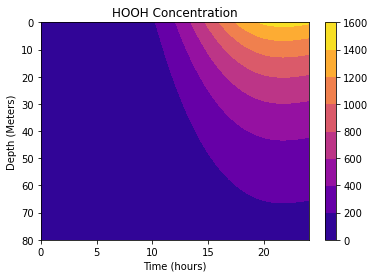

In [11]:
#contour plot of nutrients
plt.contourf(t,zetas,sols[:,:,3],cmap = 'plasma')
plt.gca().invert_yaxis()
plt.xlabel('Time (hours)', color = 'k')
plt.ylabel('Depth (Meters)', color = 'k')
plt.title('HOOH Concentration')
plt.colorbar()
plt.savefig("HOOH", bbox_inches='tight', dpi=300)